<h1><center>Final Project</center></h1>

<div style="text-align: right"> Tarun Varma - QZ55613 </div>
<div style="text-align: right"> Faisal Rasheed Khan - VB02734 </div>
<div style="text-align: right"> Rohith Reddy Mada - IO15211 </div>
<div style="text-align: right"> Maitri Hemant Mistry - DQ13213 </div>

### Cleaning the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ECommerce-Data.csv")

In [3]:
df.head(3)

,Household,"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."
0,Clothing & Accessories,TRYSCO Casual Genuine Leather Slim Girls Belt ...
1,Household,Cloth Fusion Cotton Table Linen Set of 14 Pc (...
2,Electronics,Tarkan Ultra Slim Mono Fan Portable Cooling Pa...


Here, we can see that what should be the first row is instead being treated as the column headers. We can fix this by simply renaming the columns.

In [4]:
df["Label"] = df["Household"]
df["Product Data"] = df["Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room."] 

In [5]:
df.drop(columns=['Household', 'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal bliss.so bring home this elegant print that is lushed with rich colors that makes it nothing but sheer elegance to be to your friends and family.it would be treasured forever by whoever your lucky recipient is. Liven up your place with these intriguing paintings that are high definition hd graphic digital prints for home, office or any room.'], inplace=True)

In [6]:
df.head(3)

,Label,Product Data
0,Clothing & Accessories,TRYSCO Casual Genuine Leather Slim Girls Belt ...
1,Household,Cloth Fusion Cotton Table Linen Set of 14 Pc (...
2,Electronics,Tarkan Ultra Slim Mono Fan Portable Cooling Pa...


Now, our next task should be to check if there are any null values in Label or Product Data field. If there are, we can drop these from the dataframe

In [7]:
df.isna().sum()

Label           0
Product Data    1
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum()

Label           0
Product Data    0
dtype: int64

Lets observe the size of the dataframe

In [10]:
df.shape

(12605, 2)

Lastly, lets look at the distribution of Labels in the dataframe

In [11]:
df["Label"].value_counts(1)

Household                 0.383023
Books                     0.234431
Electronics               0.210631
Clothing & Accessories    0.171916
Name: Label, dtype: float64

From this, we can see that the data is slightly unbalanced, but not heavily so. When it comes to choosing a metric to evaluate the model, accuracy may not be the best way to go. We should focus on the F1 score as well. 

### Getting BERT and Word2Vec Embeddings

In [12]:
#BERT Embeddings
from transformers import BertTokenizer, BertModel
import torch
import cupy as cp
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# print(device)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

model     = model.to(device)

paragraphs = df['Product Data'].astype(str).tolist() #This stores all the product data in a list
embeddings = []

for paragraph in paragraphs:
    inputs = tokenizer(paragraph, return_tensors='pt', padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs) #Referred discuss.huggingface for this part
#https://discuss.huggingface.co/t/generate-raw-word-embeddings-using-transformer-models-like-bert-for-downstream-process/2958
    paragraph_embedding = outputs.last_hidden_state[:, 0, :].cpu().numpy()
    embeddings.append(paragraph_embedding)

df['BERT Embeddings'] = embeddings

In [13]:
#Word2Vec Embeddings
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

tokenized_paragraphs = [word_tokenize(para.lower()) for para in paragraphs]
word2vec_model = Word2Vec(sentences=tokenized_paragraphs, vector_size=100, window=5, min_count=1, sg=0)
#For above lines, took help from stack overflow
#https://stackoverflow.com/questions/71429127/how-to-apply-word2vec-to-dataframe-column

def generate_word2vec_embeddings(document):
    words = word_tokenize(document.lower())
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return embeddings

word2vec_embeddings = [generate_word2vec_embeddings(para) for para in paragraphs]
df['Word2Vec Embeddings'] = word2vec_embeddings

[nltk_data] Downloading package punkt to /home/rohan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df.head(3)

,Label,Product Data,BERT Embeddings,Word2Vec Embeddings
0,Clothing & Accessories,TRYSCO Casual Genuine Leather Slim Girls Belt ...,"[[-0.10176195, -0.79533064, 0.22960415, -0.031...","[[-0.009227599, 0.0036671774, 0.008923487, 0.0..."
1,Household,Cloth Fusion Cotton Table Linen Set of 14 Pc (...,"[[-0.93849474, -0.8247274, 0.30506644, -0.4215...","[[-1.2212818, 0.36776692, 1.1208278, 0.8710736..."
2,Electronics,Tarkan Ultra Slim Mono Fan Portable Cooling Pa...,"[[-0.99008554, -0.10183348, 0.23847538, -0.287...","[[-0.025184345, 0.046211857, 0.13333406, -0.03..."


From above, we can see that the BERT Embeddings and Word2Vec embeddings have been appended to the dataframe. We can not perform the same with TF-IDF and Count Vectorizers just yet, as this task needs to be performed separately for the train and test splits. For the train we need to do a fit_transform, while for the test we need to just do transform.

### Getting the train-test split

In [15]:
from sklearn.model_selection import train_test_split
from cuml.common.device_selection import set_global_device_type
# from sklearn.decomposition import PCA
from cuml.decomposition import PCA, IncrementalPCA
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import cudf
from sklearn.preprocessing import LabelEncoder

set_global_device_type('GPU')

There is a special case for the Word2Vec column. Unlike BERT, which provides a (1, 768) vector for each product data, Word2Vec outputs a list of arrays of shape (100,). So, we want to flatten this out. But for computational reasons we were unable to, and instead replaced each array with its mean.

In [18]:
def get_splits(embedding):
    le = LabelEncoder()
    if embedding == "BERT Embeddings":
        X = df[embedding].apply(lambda x: x.flatten()) #Flattens the df into 768 columns
        X = X.apply(pd.Series)
    elif embedding == "Word2Vec Embeddings":
        X = df[embedding].apply(pd.Series) 
        mean_array = X.applymap(lambda arr: np.mean(arr)).values
        X = pd.DataFrame(mean_array) 
        X = X.fillna(0)
        y = df['Label']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
        y_train = le.fit_transform(y_train)
        y_test = le.fit_transform(y_test)
        return X_train, X_test, y_train, y_test
    elif embedding == "TF-IDF Embeddings":
        X_train, X_test, y_train, y_test = train_test_split(df['Product Data'], df['Label'], test_size=0.2, random_state=123)
        tf = TfidfVectorizer()
        X_train_vec = tf.fit_transform(X_train) #Fit transform on training data
        X_test_vec = tf.transform(X_test) #Transform on test data
        X_train = pd.DataFrame(X_train_vec.toarray(), columns=tf.get_feature_names_out())
        X_test = pd.DataFrame(X_test_vec.toarray(), columns=tf.get_feature_names_out())
        X_train_cudf = cudf.DataFrame.from_pandas(X_train)
        X_test_cudf = cudf.DataFrame.from_pandas(X_test)
        pca = IncrementalPCA(n_components=500, output_type='cupy') 
        X_train_cupy = pca.fit_transform(X_train_cudf)
        X_test_cupy = pca.transform(X_test_cudf)
        X_train_arr = X_train_cupy.get()
        X_test_arr = X_test_cupy.get()
        X_train = pd.DataFrame(X_train_arr)
        X_test = pd.DataFrame(X_test_arr)
        y_train = le.fit_transform(y_train)
        y_test = le.fit_transform(y_test)
        return X_train, X_test, y_train, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(df['Product Data'], df['Label'], test_size=0.2, random_state=1234)
        cv = CountVectorizer()
        X_train_vec = cv.fit_transform(X_train)
        X_test_vec = cv.transform(X_test)
        X_train = pd.DataFrame(X_train_vec.toarray(), columns=cv.get_feature_names_out())
        X_test = pd.DataFrame(X_test_vec.toarray(), columns=cv.get_feature_names_out()) #Similar to TFIDF
        X_train = X_train.astype(float)  #cuML models require input datatype to be float and not int
        X_test = X_test.astype(float)   
        X_train_cudf = cudf.DataFrame.from_pandas(X_train)
        X_test_cudf = cudf.DataFrame.from_pandas(X_test)
        pca = IncrementalPCA(n_components=500,  output_type='cupy') 
        X_train_cupy = pca.fit_transform(X_train_cudf)
        X_test_cupy = pca.transform(X_test_cudf)
        X_train_arr = X_train_cupy.get()
        X_test_arr = X_test_cupy.get()
        X_train = pd.DataFrame(X_train_arr)
        X_test = pd.DataFrame(X_test_arr)
        y_train = le.fit_transform(y_train)
        y_test = le.fit_transform(y_test)
        return X_train, X_test, y_train, y_test
    y = df['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    return X_train, X_test, y_train, y_test

Lets test this out for a random embeddings. Say BERT

In [19]:
X_train, X_test, y_train, y_test = get_splits('BERT Embeddings')

In [20]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
1767,-0.339813,-0.693982,-0.098318,-0.485539,-0.247999,-0.565327,0.142396,0.583992,0.221362,-0.693478,...,0.242236,0.043161,0.180329,-1.105253,0.050348,0.409863,-0.488179,0.274495,0.965488,0.351016
8452,-0.758642,-0.296734,-0.486532,-0.379214,0.096235,-0.326066,-0.142484,-0.059484,-0.288032,-0.454609,...,0.199046,-0.614345,-0.687810,-0.815065,0.022151,0.396890,-0.592971,-0.030418,0.793560,0.116338
4041,-0.277844,-0.242107,0.180446,-0.238190,-0.107133,-0.386096,0.030225,0.436429,-0.044250,-0.545601,...,-0.088723,-0.573039,0.272160,-0.469874,0.145801,-0.055537,-0.388521,-0.135154,-0.157554,0.286825


Now all our data for the 4 embeddings is converted to a form that makes it easy to train on

### Training

For this project, we use Random Forest, SVM, and Logistic Regression models on each of the 4 embeddings above

In [21]:
# from sklearn.ensemble import RandomForestClassifier
from cuml import RandomForestClassifier
# from sklearn.svm import SVC
from cuml.svm import SVC
# from sklearn.linear_model import LogisticRegression
from cuml.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [22]:
rf = RandomForestClassifier()
svm = SVC(kernel='linear')
lr = LogisticRegression(max_iter=500)

[W] [20:49:09.371332] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


Now, we build a helper function to fit these models to the data and return the accuracy and F1 scores

In [23]:
def get_scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

Now, testing the train test splits we got from BERT Embeddings on a random model, say Random Forest: 

In [24]:
get_scores(rf, X_train, X_test, y_train, y_test)

(0.9190797302657675, 0.9189388081036821)

The last step is to perform this operation on all the different Embedding and Model combinations. With 4 embeddings and 3 Models, we can expect a total of 12 different scores. To help this, lets make a list of all the different Embeddings, and create a dictionary of model names, and their instantiated values

In [25]:
embeddings_list = df.columns[2:].tolist() #Stores the BERT and Word2Vec Embeddings
embeddings_list.extend(['TF-IDF Embeddings', 'Bag of Words Embeddings']) #Adds the other two which weren't present in df

In [26]:
embeddings_list

['BERT Embeddings',
 'Word2Vec Embeddings',
 'TF-IDF Embeddings',
 'Bag of Words Embeddings']

In [27]:
models = {'Random Forest':rf, 'SVM':svm, 'Logistic Regression':lr}

In [28]:
acc_scores = []
f1_scores = []
emb_acc = []
emb_f1 = []
for embedding in embeddings_list:
    X_train, X_test, y_train, y_test = get_splits(embedding)
    for model in models:
        acc, f1 = get_scores(models[model], X_train, X_test, y_train, y_test)
        emb_acc.append(acc)
        emb_f1.append(f1)
        print(f'Accuracy with {embedding} trained on {model} model: {acc}')
        print(f'F1 Score with {embedding} trained on {model} model: {f1}') 
        print("\n")
    acc_scores.append(emb_acc)
    f1_scores.append(emb_f1) #We are storing the values to plot them in a graph later on
    emb_acc = []
    emb_f1 = [] 

Accuracy with BERT Embeddings trained on Random Forest model: 0.9190797302657675
F1 Score with BERT Embeddings trained on Random Forest model: 0.9189388081036821


Accuracy with BERT Embeddings trained on SVM model: 0.9139230464101546
F1 Score with BERT Embeddings trained on SVM model: 0.9138674538792648


[W] [20:49:13.143319] L-BFGS: max iterations reached
[W] [20:49:13.143653] Maximum iterations reached before solver is converged. To increase model accuracy you can increase the number of iterations (max_iter) or improve the scaling of the input data.
Accuracy with BERT Embeddings trained on Logistic Regression model: 0.9309797699325665
F1 Score with BERT Embeddings trained on Logistic Regression model: 0.9309248253458553




/home/rohan/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Accuracy with Word2Vec Embeddings trained on Random Forest model: 0.6049186830622769
F1 Score with Word2Vec Embeddings trained on Random Forest model: 0.5761380292377815


Accuracy with Word2Vec Embeddings trained on SVM model: 0.5680285600952003
F1 Score with Word2Vec Embeddings trained on SVM model: 0.5446355177283161


Accuracy with Word2Vec Embeddings trained on Logistic Regression model: 0.5660452201507339
F1 Score with Word2Vec Embeddings trained on Logistic Regression model: 0.5441516745178836




/home/rohan/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Accuracy with TF-IDF Embeddings trained on Random Forest model: 0.935739785799286
F1 Score with TF-IDF Embeddings trained on Random Forest model: 0.9356581493289282


Accuracy with TF-IDF Embeddings trained on SVM model: 0.9412931376437922
F1 Score with TF-IDF Embeddings trained on SVM model: 0.9411793905418594


Accuracy with TF-IDF Embeddings trained on Logistic Regression model: 0.9393097976993257
F1 Score with TF-IDF Embeddings trained on Logistic Regression model: 0.9391977313157056




/home/rohan/miniconda3/envs/rapids-23.12/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Accuracy with Bag of Words Embeddings trained on Random Forest model: 0.8706862356207854
F1 Score with Bag of Words Embeddings trained on Random Forest model: 0.8711962070845715


Accuracy with Bag of Words Embeddings trained on SVM model: 0.9365331217770726
F1 Score with Bag of Words Embeddings trained on SVM model: 0.9365280133217438


Accuracy with Bag of Words Embeddings trained on Logistic Regression model: 0.9254264180880603
F1 Score with Bag of Words Embeddings trained on Logistic Regression model: 0.9254047965809473




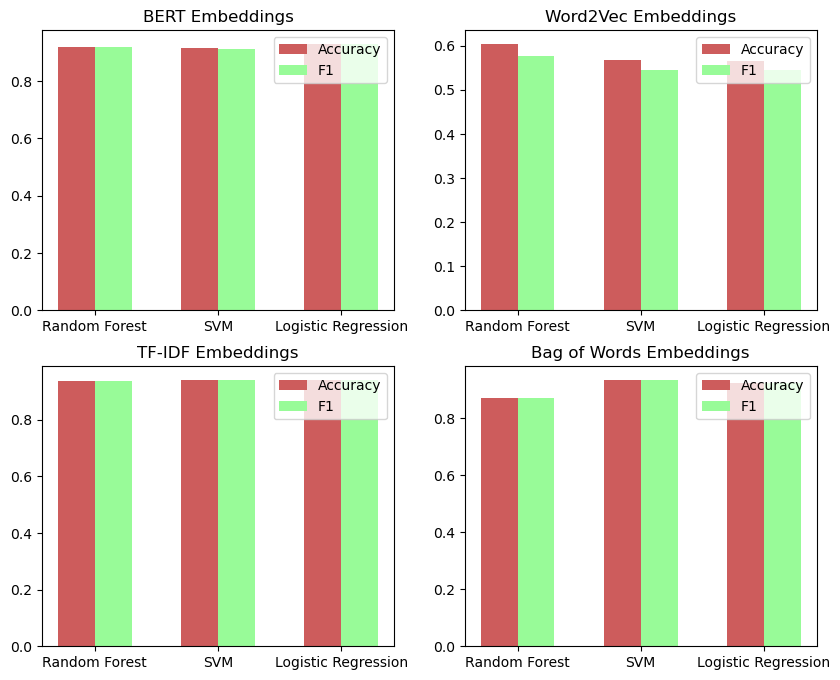

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# import cupy as cp

bar_width = 0.3

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        index = i * 2 + j  
        x = np.arange(len(acc_scores[index]))
        axs[i, j].bar(x, acc_scores[index], width=bar_width, label='Accuracy', color='indianred')
        axs[i, j].bar(x + bar_width, f1_scores[index], width=bar_width, label='F1', color='palegreen') 
        #Referred stack overflow to get both Accuracy and F1 scores side by side in bar graph
        axs[i, j].set_title(embeddings_list[index])
        axs[i, j].set_xticks(x + bar_width / 2) 
        axs[i, j].set_xticklabels(list(models.keys()))
        axs[i, j].legend()
plt.show()